# Analiza wskźnika GPD ze szczególnym uwzględnieniem kryzysu ekonomicznego 2008-2009

### Wstępne informacje kluczowe dla dalszej analizy
Dane będziemy analizować wykorzystując odpowiednio pogrupowane wartości wskaźnika GPD (gross domestic product), a więc nic innego jak angielskie określenie na PKB (produkt krajowy brutto). Z definicji produkt krajowy brutto opisuje wartość wszystkich dóbr i usług finalnych wytworzonych przez narodowe i zagraniczne czynniki produkcji na terenie danego państwa w określonej jednostce czasu. Najprościej możemy to przełożyć na miarę, ile kraje *zarobiły* w konkretnej jednostce czasu, w naszej analizie wsakżnik PKB podany jest w mierze procentowej, a jednostką czasu jest rok.
Ponad to nasza analiza głównie skupi się na globalnym kryzysie finansowym 2007/2008, a więc jednym z największych kryzysów, jakie dotknęły gospodarkę światową. Sam kryzys rozpoczął się w Stanach Zjednoczonych ze względu na nadmierne udzielaniem kredytów hipotecznych osobom, które nie były w stanie ich spłacić. W konsekwencji doprowadziło to do ogromnych strat czy nawet upadków dużych banków amerykańskich. Ze względu na globalizacje rynku, a więc też międzynarodowe powiązania finansowe, kryzys rozprzestrzenił się szybko na inne kraje.

### W kolejnych krokach przyjrzymy się podstawowym statystykom i ich wizualizacjom dotyczących GDP w różnych krajach

> Analiza ze względu na lata

<div style="text-align: center;">
    <img src="recession_table_1.png">
    <center>recession_table_1 - częstości wskaźnika GDP (annual %) dla poszczególnych lat</center>
</div>

W tabeli widzimy, że na przestrzeni lat 2007-2008, ujemne PKB wzrasta z 4% do 18% krajów dotkniętych takim problemem. W roku 2009 aż 49% państw posiada ujemne PKB! Potwierdzając wcześniej wspomniane teoretyczne informacje dotyczące kryzysu finansowego, możemy wnioskować również na podstwie naszej tabeli, że sam kryzys rozpoczynający się w USA w połowie 2007 stopniowo wpływał negatywnie na sytuacje finansową w innych państwach, osiagając wartość szczytową w 2009, gdzie dla prawie połowy analizowanych krajów określono ujemny wskaźnik PKB. Na podstwie tabeli możemy też wnioskować, że w roku 2010 sytuacja finansowa większości państw uległa poprawie (odsetek państw o ujemnym PKB spadł z 49% do 12%). Co więcej w tym roku brak już krajów o współczynniku produktu krajowego brutto mniejszym lub równym -10%, gdzie tylko rok wczesniej takie państwa stanowiły aż 6%. \
Patrząc  na "drugą stronę" tabeli możemy zauważyć, że o ile przed załamaniem rynku globalnego (2006, 2007) większość państw określała PKB w przedziale 5-10%, w trakcie kryzysu, a nawet po początkowym ustabilizowaniu się globalnej gospodarki większość krajów odnotowuje PKB już w niższym przedziale, a więc 0-5%. Zauważyć możemy także, że pomimo iż w roku 2009, a więc jak wynika z danych, roku największego globalnie załamania ekonomicznego, 4% państw odnotowała PKB większe od 10%, a 1% nawet w zakresie 25-30% (są to najprawdopodbniej państwa niezależne aż tak bardzo od USA, lub z bardzo stabliną gospodarką).

<div style="text-align: center;">
    <img src="recession_1_plot.png">
    <center>recession_table_1 - częstości wskaźnika GDP (annual %) dla poszczególnych lat</center>
</div>

Powyższy wykres potwierdza wcześniejsze obserwacje, jak na przykład ogólną tendencję dla średniego obniżenia wskażnika GPD w roku 2009. Dla tego roku widać, wzrost ujemnych i spadek dodatnich wartości współczynnika. Wykres bardziej spłaszcza się i widać, że wartości współczynnika mniejszego od około 2% - 3% stanowią większą część danych. Widać również bardzo dobrze jak wartości szczytowe wykresów, a więc najczęstsze wartości PKB dla krajów, z około 7% - 8% przed kryzysem, przechodzą w wartość około 2% - 3% po kryzysie.

> Analiza ze względu na lata i regiony geograficzne

Analizę wskaźnika PKB ze względu na region wykonamy na podstwie:
* map świata z oznaczonymi rozkładami wskaźnika PKB dla każdego z państw
* tabeli przedstawiającej częstość wskaźnika GPD (annual %) dla poszczególnych regionów oraz odpowiadających im wykresów

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

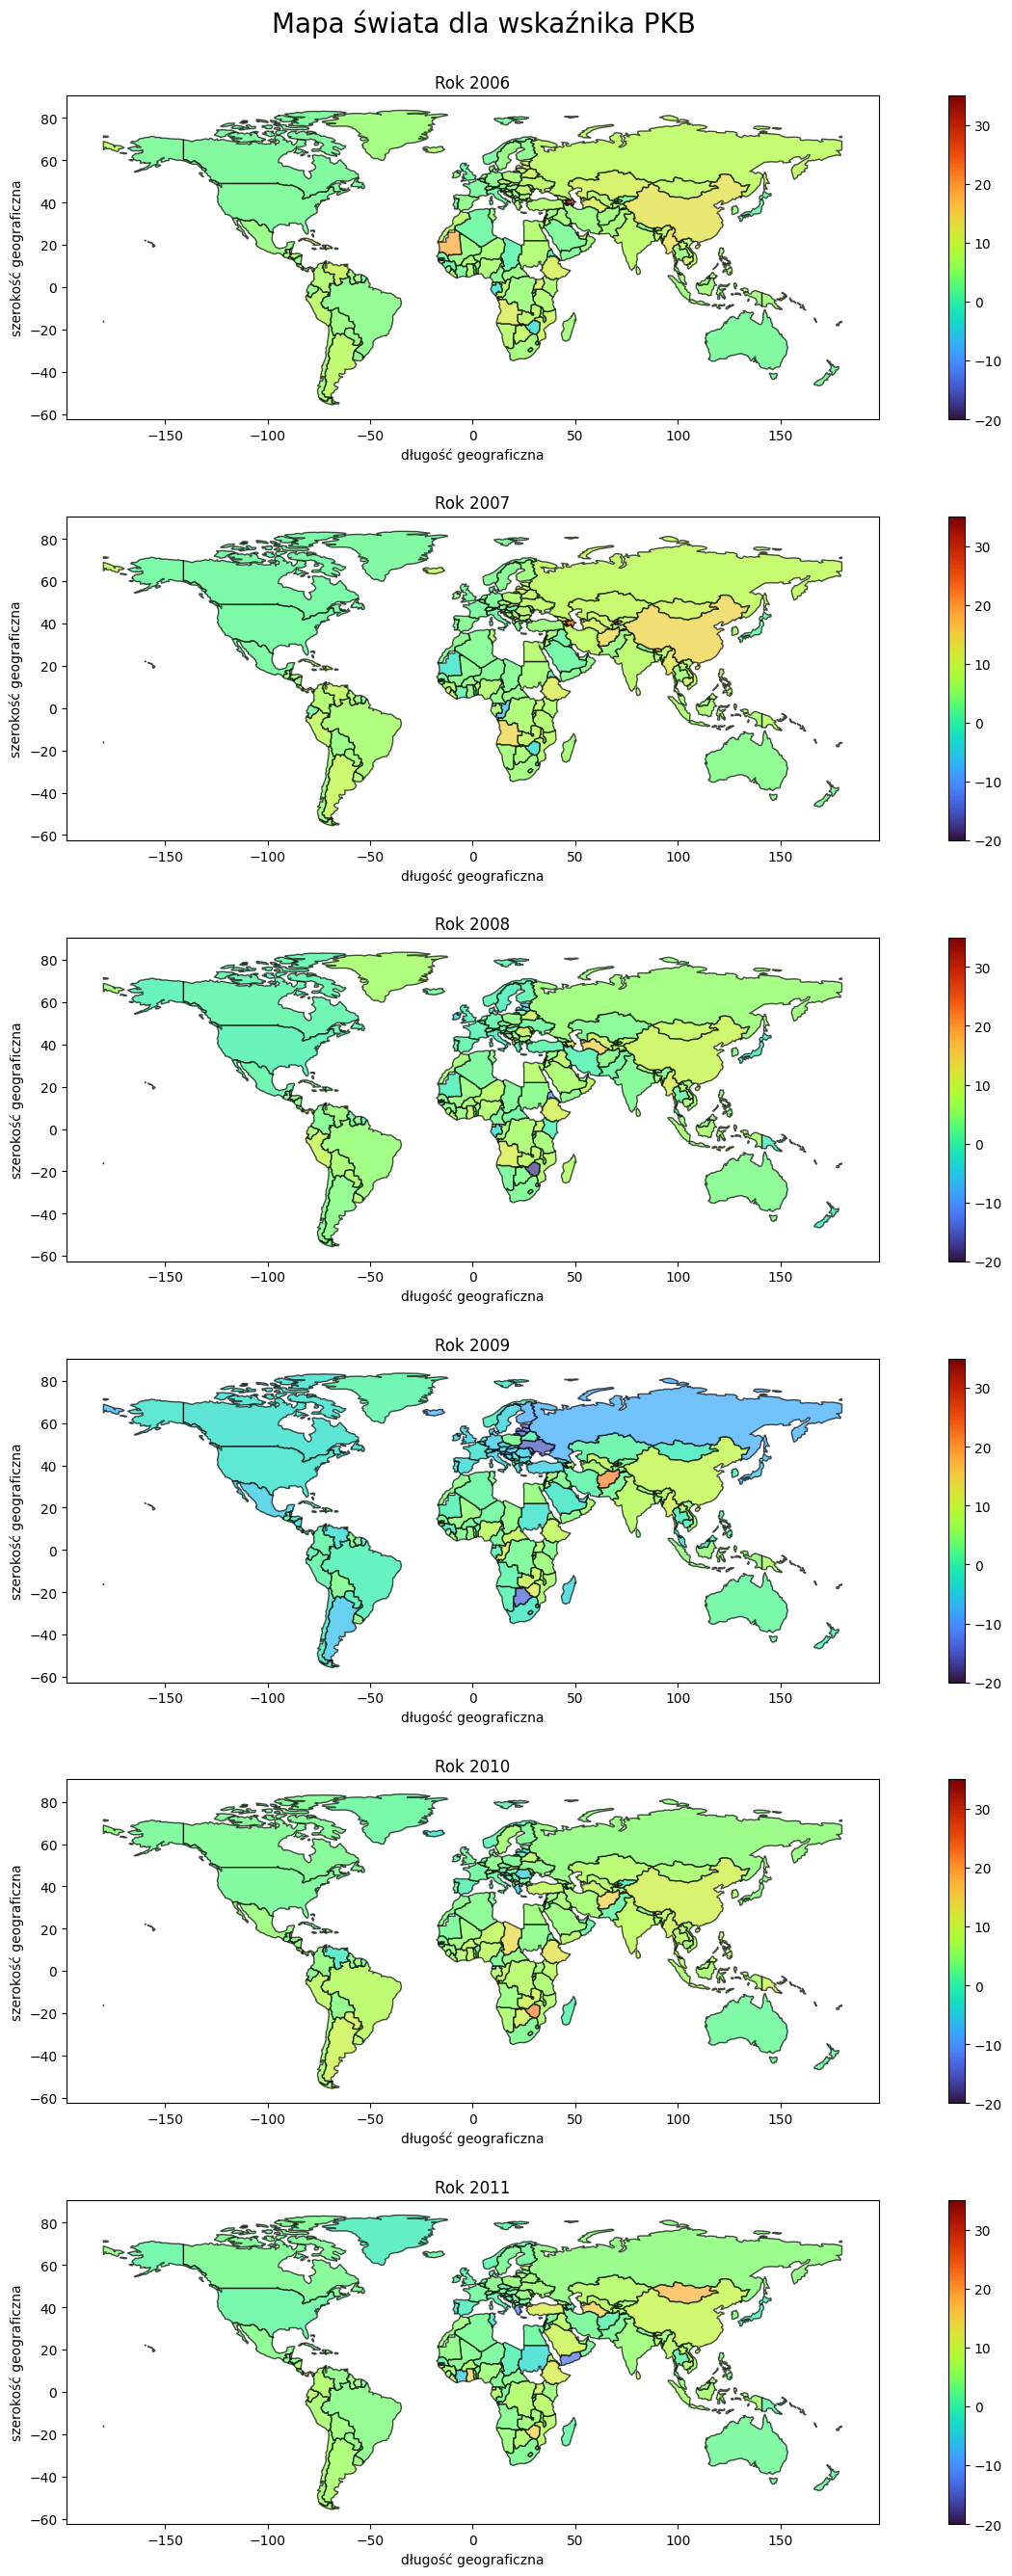

In [4]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
recession_data_1 = pd.read_pickle("../recession_data_1.pkl")
world = world.rename(columns = {'iso_a3': 'Country Code'})
pkb_df = pd.merge(world,recession_data_1, on = 'Country Code')
years = ['2006', '2007', '2008', '2009', '2010', '2011']

vmin, vmax = -20, 35
fig,ax = plt.subplots(6, 1, figsize = (20, 30)) 
plt.suptitle("Mapa świata dla wskaźnika PKB", fontsize = 20)
plt.subplots_adjust(hspace = 0.3, top = 0.95, right = 0.85)
for i in range(len(years)):
    pkb_df.plot(
        ax = ax[i],
        column = years[i],
        cmap = 'turbo',
        vmin = vmin,
        vmax = vmax,
        legend = True,
        edgecolor = "black",
        alpha = 0.7,
    )
    ax[i].set_title(f"Rok {years[i]}")
    ax[i].set_xlabel("długość geograficzna")
    ax[i].set_ylabel("szerokość geograficzna")

Pierwsza rzecz jaka rzuca się w oczy porównując wszystkie wykresy to przewaga koloru turkusowego/niebieskiego (a więc PKB o wartościach zbliżonych do 0 czy ujemnych) w roku 2009. Zjawisko to widoczne jest głównie w krajach Ameryki Północnej (szczególnie Meksyk), Ameryki Południowej (szczególnie Argentyna), Azji (szczególnie Rosja, Japonia) oraz większości krajów Europejskich (szczególnie Ukraina, Litwa, Łotwa, Estonia). Spadek PKB w tych obszarach jest widoczny bardzo dobrze na przestrzeni 2007-2009, gdzie wartości dla wspomnianych obszarów cały czas maleją. Co ciekawe spoglądając dokładniej na obszar Azji możemy zauważyć, zę kryzys nie dotknął w większym stopni kilku panśtwa Chin, Mongolii, Kazachstanu i Afganisatnu. Jeśli chodzi o pierwsze trzy państwa to było tak najprowdopodobnie dlatego, że Chiny posiadają....

<div style="text-align: center;">
    <img src="recession_table_2.png">
    <center>recession_table_2 - częstości wskaźnika GDP (annual %) dla poszczególnych regionów oraz lat</center>
</div>

<div style="text-align: center;">
    <img src="recession_2_plot.png">
    <center>recession_table_2 - diagram częstości wskaźnika GDP (annual %) dla poszczególnych regionów oraz lat</center>
</div>

### Analiza ze względu na stopień zamożności państw 
W grupie o niskim współczynniku GDP (prawdopodobnie kraje afrykańskie i azjatyckie) można zauważyć spadek dynamiki rozwoju państw, nie nastąpił za to wzrost liczby państw z ujemnym wzrostem PKB. Jedynym wyjątkiem jest wartość w 2009 roku dla przedziału -5 do 0, wpływ na to mógł mieć kryzys w gospodarce w 2008 , jednak nie jest to drastyczny spadek.

Dla klasy Lower middle również widoczny jest spadek rozwoju państw po roku 2008. Widoczny wzrost wartości dla ujemnego wzrostu PKB w przedziale -5 do 0. Można z pewnością stwierdzić, że kryzys ekonomiczny dotknął państwa znajdujące się w tym przedziale ekonomicznym. Miało na to wpływa zwiększające się bezrobocie i wysokie zadłużenie banków.

W klasie Upper Middle,  podobnie jak w Lower middle nastąpiło duże zatrzymanie rozwoju państw po roku 2008, państwa średnio zamożne zostały mocno dotknięte kryzysem gospodarczym. Prawie 60% krajów miało ujemny przyrost wskaźnika GDP, a tylko 2% krajów miało W następnych latach widoczny powolny wzrost współczynnika GDP spowodowany próbą odbudowy gospodarki. W 2010 widać wzrost rozwoju a w 2011 widać ponowne zatrzymanie rozwoju. Można podejrzewać, że wpływ na to miała Arabska wojna, protesty i konflikty doprowadziły do krótkoterminowego spadku GDP. Widać duże wahania i zmiany każdego roku, sytuacja polityczno-gospodarcza znacząco wpływa na tą grupę krajów

W grupie High widać największe zatrzymanie wzrostu współczynnika GDP, kraje gdzie ten współczynnik był na minusie wynoszą 80% całości. Najbardziej dotkniętymi krajami kryzysu ze względu na zatrzymanie rozwoju są Grecja, Irlandia i Portugalia. Odbudowa gospodarki dla krajów wysokorozwiniętych jest trudna, rok po kryzysie nastąpiła widoczna poprawa sytuacji gospodarczej, jednak w kolejnych latach sytuacja była już mniej rozwojowa



<div style="text-align: center;">
    <img src="recession_table_3.png">
    <center>recession_table_3 - częstości wskaźnika GDP (annual %) dla poszczególnych stopni zamożności oraz lat</center>
</div>

<div style="text-align: center;">
    <img src="recession_plot_3.png">
    <center>histplot na podstwie recession_table_3 - diagram częstości wskaźnika GDP (annual %) dla poszczególnych stopni zamożności oraz lat</center>
</div>

Spójrzmy na Diagramy częstości. W przypadku państw przynależących do grupy upper-middle możemy mówić o dużym kryzysie gospodarczym, tak samo jak w przypadku grupy high. Państwa przynależące do kategorii upper-middle stopniowo odbudowywały gospodarkę, zauważamy równomierny wzrost wskaźnika GDP, natomiast nie możemy stwierdzić, że dobrobyt wrócił do wcześniejszego poziomu. Państwa o wysokim stopniu zamożności już wcześniej miały niski przyrost PKB, jest to charakterystyczne dla populacji wysoko rozwiniętej, natomiast te kraje zostały najbardziej dotknięte kryzysem i nie były w stanie sobie z nim poradzić tak dobrze jak inni.


<div style="text-align: center;">
    <img src="boxplot.png">
    <center>boxplot na podstawie recession_data_1 - wykresy pudełkowe dla wskaźnika GPD według lat, lat oraz stopnia zamożności, lat oraz regionów</center>
</div>

**GPD boxplot grouped by income** \
W klasie  Low kryzys w 2008 nie wpłynął znacząco, współczynnik GPD utrzymuje się na podobnym poziomie przez cały analizowany okres, nie ma znaczących wzrostów i spadków, występują pojedyncze wartości odstające.
W grupie Lower middle widać spadek średniej wartości w 2009 roku, w kolejnych latach wraca on do poziomu sprzed kryzysu, niewielka ilość wartości odstających, Q1 i Q3 w podobnych zakresach na przestrzeni analizowanych lat.
W grupie Upper-middle i High widoczny spadek wartości poniżej 0 po 2008 roku, w 2010 roku widoczna poprawa i wzrost GPD, w kolejnym roku unormowany wzrost. Występują wartości odstające. Dla grupy High widać największe zmiany

Korzystając z danych zawartych w tablicy recession_data_1 oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:

wartość średnia (ang. mean),
odchylenie standardowe (ang. standart deviation),
wartość minimalna (ang. minimum),
kwartyle (ang. quartiles),
wartość maksymalna (ang. maximum),
eksces/kurtoza (ang. excess kurtosis),
skośność (ang. skew).

<div style="text-align: center;">
    <img src="descriptive_param.png">
    <center>charakterystyki opisowe rozkładu na podstawie recession_data_1</center>
</div>